In [1]:
import os
# running from Root directory
os.chdir("..")

In [67]:
from networks.loaders.network_loader import NetworkLoader
from utils.types import NetworkInputType, NetworkLoaderArgs
from networks.network import Network
import networkx as nx
import matplotlib.pyplot as plt
from typing import Any
import numpy as np

simple_input_args = NetworkLoaderArgs(
    synapse_threshold=5,
    filter_polarity=['+', '-'],
    filter_prim_nt=['GABA', 'Glu', 'ACh', 0]
)
loader = NetworkLoader(simple_input_args)
network = loader.load_network_file(file_path="networks/data/polarity_2020/s1_data.xlsx",
                                    sheet_name='5. Sign prediction',
                                    input_type=NetworkInputType.polarity_xlsx)


Network file name: s1_data.xlsx
Filtering Neurons with polarity: ['+', '-']
Filtering Neurons with primary neurotransmitter: ['GABA', 'Glu', 'ACh', 0]
Polarity E/I ratio (before filtering): 3.122

Network properties:
	Neurons: 283
	Neurons with a Synapse: 283
	Synapses in the network: 11650

	Participating Nodes are neurons in a tuple with at least: 5 synapses
	Synapses in the graph: 9515
	Nodes: 259
	Edges: 661
	Average clustering coefficient: 0.06
	Average shortest path (undirected): 2.038
	Density: 0.01
	Polarity E/I ratio: 3.721
	Degree: Mean: 5.104 Std: 4.445 Median: 4.0 Max: 25 (node: RIAL)
	In-Degree: Mean: 2.552 Std: 3.973 Median: 1.0 Max: 23 (node: AVBL)
	Out-Degree: Mean: 2.552 Std: 2.283 Median: 2.0 Max: 13 (node: RIML)


In [79]:
def basic_plot(data: Any, title: str, xlabel: str, ylabel: str, plot_func: Any, log_scale=False):
    plt.figure()

    if log_scale:
        plt.yscale("log")
        plt.xscale("log")

    plot_func(*data)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

In [80]:
def plot_graph(network: Network):
    # TODO: need better plotting tools / motif plotting
    if network.neuron_names:
        mapping = {i: n for i, n in enumerate(network.neuron_names)}
        plot_g = nx.relabel_nodes(network.graph, mapping)
    else:
        plot_g = network.graph

    plt.figure()
    nx.draw_networkx(plot_g, with_labels=True, node_size=600, node_color='lightgreen')
    plt.show()

In [81]:
def plot_rich_club_coefficient(network: Network):
    un_dir_graph = nx.Graph(network.graph)
    un_dir_graph.remove_edges_from(nx.selfloop_edges(un_dir_graph))
    rc = nx.rich_club_coefficient(un_dir_graph, normalized=False, seed=42)
    data = list(rc.keys()), list(rc.values())
    basic_plot(data=data,
               title='Rich Club Coefficient',
               xlabel='Degree (k)',
               ylabel='Rich Club Coefficient',
               plot_func=plt.scatter)


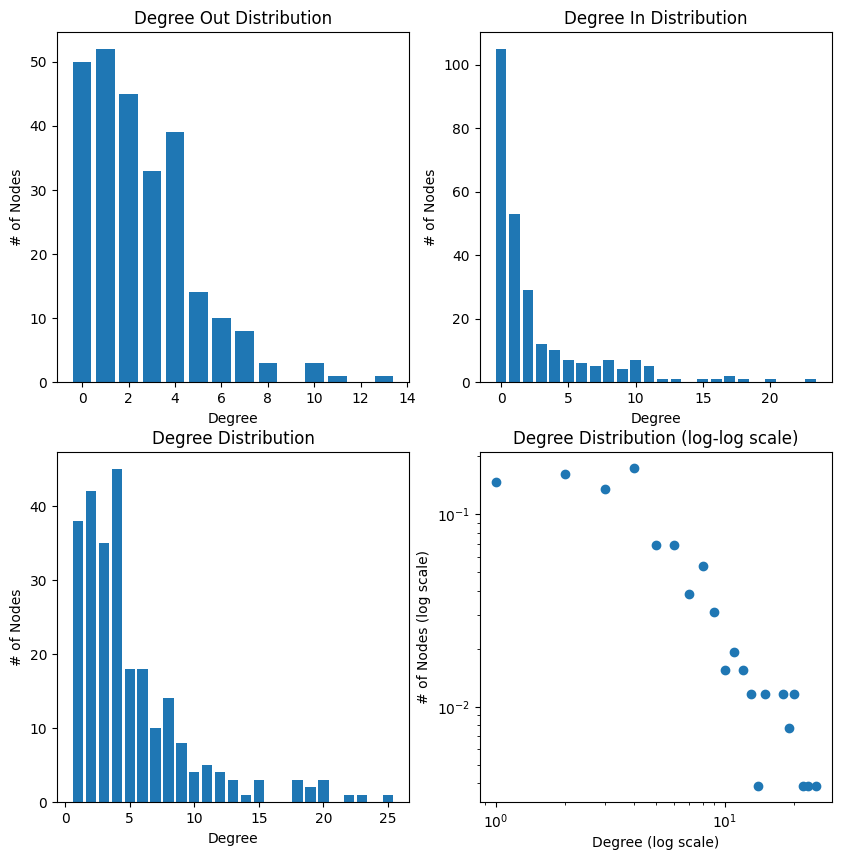

In [82]:
def _set_bar_subplot(ax, data, title, xlabel, ylabel):
    ax.bar(*data)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_degree_dist(network: Network):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    
    degree_sequence = sorted((d for n, d in network.graph.out_degree), reverse=True)
    data = np.unique(degree_sequence, return_counts=True)
    _set_bar_subplot(ax[0,0], data, 'Degree Out Distribution', 'Degree', '# of Nodes')

    degree_sequence = sorted((d for n, d in network.graph.in_degree), reverse=True)
    data = np.unique(degree_sequence, return_counts=True)
    _set_bar_subplot(ax[0,1], data, 'Degree In Distribution', 'Degree', '# of Nodes')

    degree_sequence = sorted((d for n, d in network.graph.degree()), reverse=True)
    data = np.unique(degree_sequence, return_counts=True)
    _set_bar_subplot(ax[1,0], data, 'Degree Distribution', 'Degree', '# of Nodes')

    # Log-Log
    y = nx.degree_histogram(network.graph)
    x = np.arange(0, len(y)).tolist()
    n = network.graph.number_of_nodes()

    for i in range(len(y)):
        y[i] = y[i] / n
    
    ax[1,1].plot(x, y, 'o')
    ax[1,1].set_xscale('log')
    ax[1,1].set_xlabel('Degree (log scale)')
    ax[1,1].set_yscale('log')
    ax[1,1].set_ylabel('# of Nodes (log scale)')
    ax[1,1].set_title('Degree Distribution (log-log scale)')


plot_degree_dist(network)

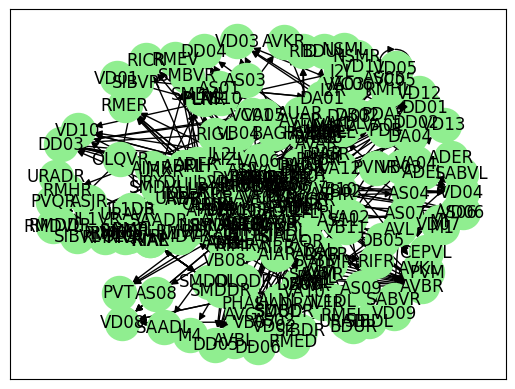

In [83]:
plot_graph(network)

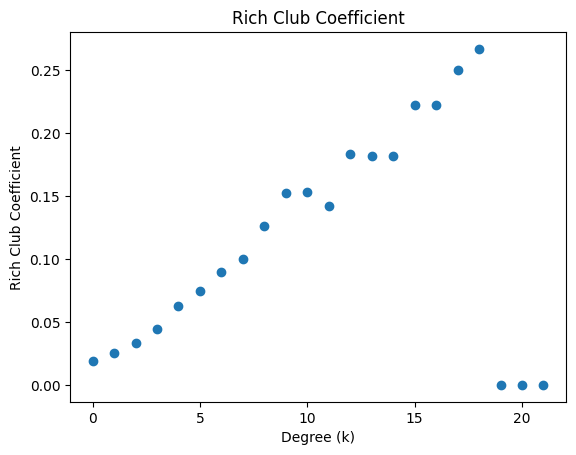

In [84]:
plot_rich_club_coefficient(network)